In [41]:
%load_ext autoreload
%autoreload 2

import torchvision
from dataset import *
from collections import Counter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
ds = TinyImageNet(root='/scratch_nas/chofer/data/tiny-imagenet-200/', train=True)
y = []
for i in range(len(ds)):
    y.append(ds[i][1])
    
yy = ds.targets
print(all(a == b for a, b in zip(y, yy)))
len(ds)

True


100000

In [47]:
ds = TinyImageNet(root='/scratch_nas/chofer/data/tiny-imagenet-200/', train=False)
y = []
for i in range(len(ds)):
    y.append(ds[i][1])
    
yy = ds.targets
print(all(a == b for a, b in zip(y, yy)))
len(ds)

True


10000

In [33]:
transform = torchvision.transforms.ToTensor()
folder = ImageNet(root='/scratch_nas/chofer/data/ImageNet', train=True, transform=transform)
y = []
for i in range(100):
    y.append(folder[i][1])
    
yy = folder.targets
all(a == b for a, b in zip(y, yy))
len(folder)

1281167

(250, 250, 3)


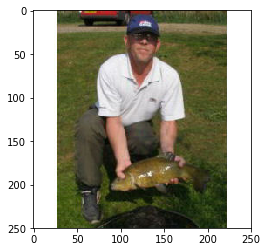

In [48]:
img = folder[0][0].permute(1, 2, 0).numpy()
print(img.shape)
plt.imshow(img)

In [113]:
tiny_imagenet_transform = transforms.Compose([
    #transforms.Resize((32,32)),
    transforms.ToTensor()])

ds = TinyImageNet(
    '/scratch_nas/chofer/data/tiny-imagenet-200', 
    transform=tiny_imagenet_transform, 
    train=False)

# ds = datasets.CIFAR100(
#     root='/scratch_nas/chofer/data/cifar100/',
#     train=True, 
#     transform=cifar10_transform, 
#     download=False)

In [114]:
def test_ds_monkey_patch(ds):
    ds_monkey_patch_target(ds)
    
    assert hasattr(ds, "targets")
    
    for i in range(100):
        assert ds[i][1] == ds.targets[i]
        
def test_ds_subset(ds):
    
    N = 100
    ds_new = ds_subset(ds, list(range(N)))
    
    assert len(ds_new) == N
    assert torch.abs(ds_new[0][0]- ds[0][0]).sum().item() == 0
    assert torch.abs(ds_new[-1][0]- ds[N-1][0]).sum().item() == 0 
    assert ds_new[0][1] == ds[0][1]
    assert ds_new[-1][1] == ds[N-1][1]

def test_ds_random_subset(ds):
    
    perc = 0.5
    
    ds_new = ds_random_subset(ds, perc, replace=False)

    assert len(ds_new) == int(len(ds)*perc)
    
def test_ds_label_filter(ds):

    expected_samples_per_label = 50
    
    ds_new = ds_label_filter(ds, [0, 3, 9])
    
    counter = Counter(ds_new.targets)
    assert all(v == expected_samples_per_label for v in counter.values())
    
    
ds_monkey_patch_target(ds)
test_ds_subset(ds)
test_ds_random_subset(ds)
test_ds_label_filter(ds)